In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Create the SQLAlchemy engine
engine = create_engine(
    'mssql+pyodbc://DELL7490\\MSSQLSERVER01/RealEstateData?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'
)

# Query the data from SQL Server
query = "SELECT * FROM [dbo].[Real estate valuation data set]"
df = pd.read_sql(query, engine)

# Display the first few rows to confirm loading
df.head()

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
0,1,2012.916992,32.0,84.878822,10,24.982981,121.540237,37.900002
1,2,2012.916992,19.5,306.594696,9,24.980339,121.539513,42.200001
2,3,2013.583008,13.3,561.984497,5,24.987459,121.543907,47.299999
3,4,2013.500000,13.3,561.984497,5,24.987459,121.543907,54.799999
4,5,2012.833008,5.0,390.568390,5,24.979370,121.542450,43.099998


No                                        0
X1_transaction_date                       0
X2_house_age                              0
X3_distance_to_the_nearest_MRT_station    0
X4_number_of_convenience_stores           0
X5_latitude                               0
X6_longitude                              0
Y_house_price_of_unit_area                0
dtype: int64
               No  X1_transaction_date  X2_house_age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281968     11.392485   
min      1.000000          2012.666992      0.000000   
25%    104.250000          2012.916992      9.025000   
50%    207.500000          2013.166992     16.100000   
75%    310.750000          2013.416992     28.150001   
max    414.000000          2013.583008     43.799999   

       X3_distance_to_the_nearest_MRT_station  \
count                              414.000000   
mean                            

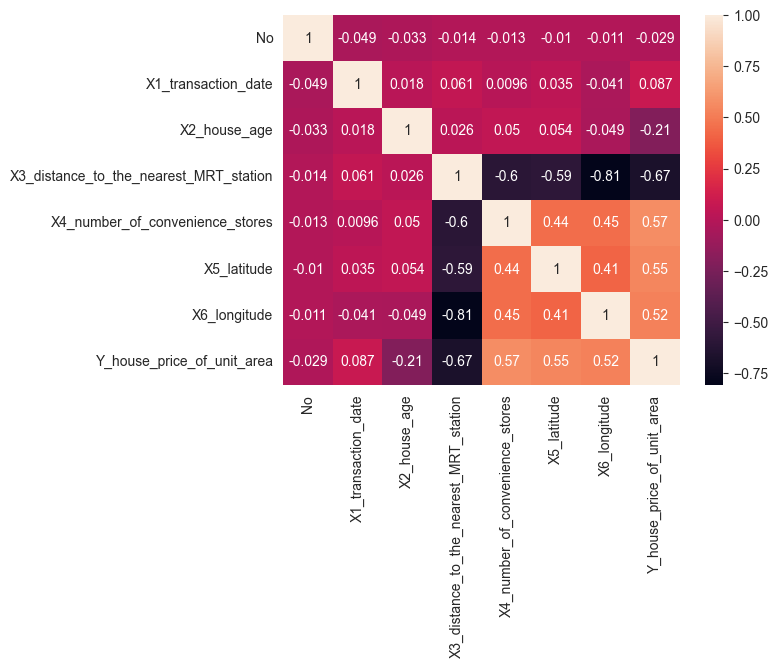

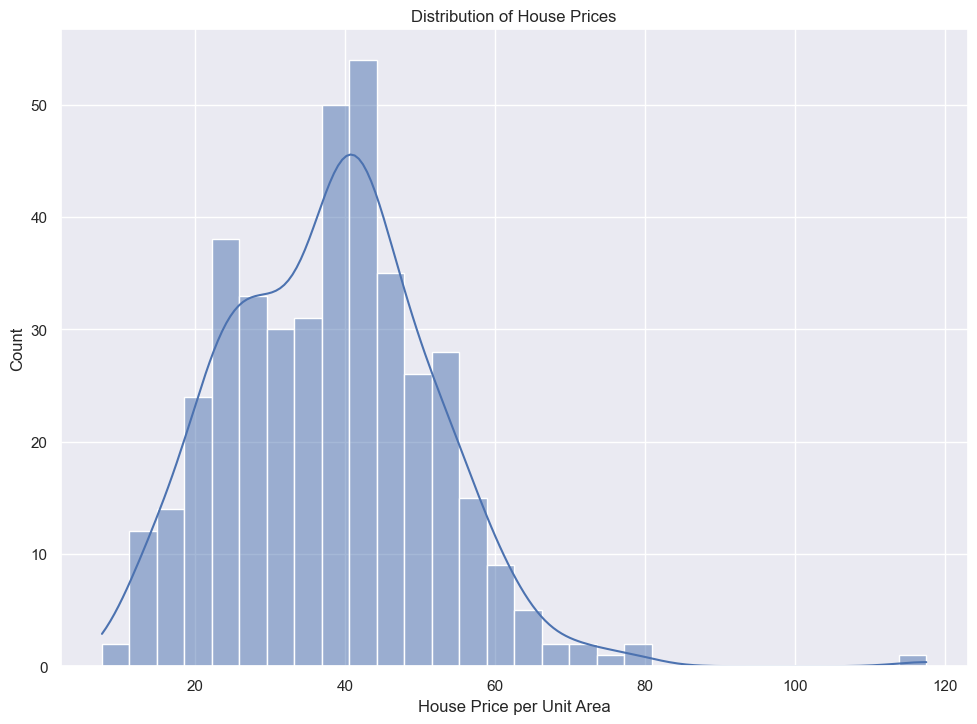

In [8]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True)
plt.show()

#Plot the distribution of the target variable
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.histplot(df['Y_house_price_of_unit_area'], bins=30, kde=True)
plt.xlabel('House Price per Unit Area')
plt.title('Distribution of House Prices')
plt.show()


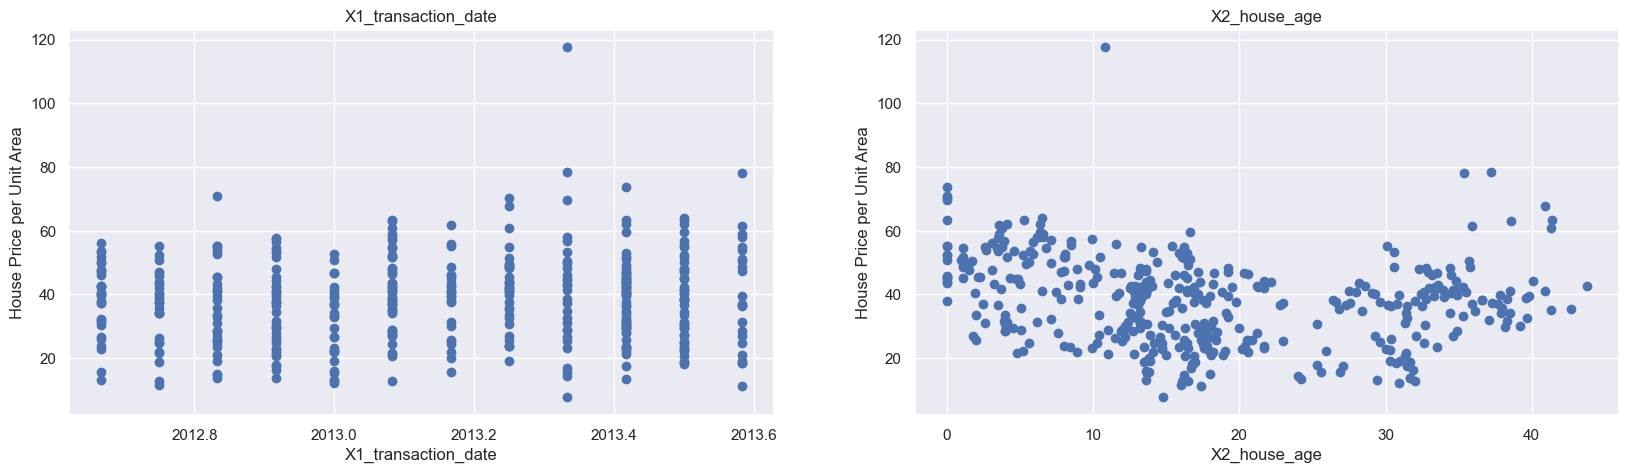

In [11]:
#Scatter plots for selected features against target variable
plt.figure(figsize=(20, 5))

# Replace 'X1' and 'X2' with actual column names from your dataset
features = ['X1_transaction_date', 'X2_house_age']  # Example features; replace with relevant columns
target = df['Y_house_price_of_unit_area']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('House Price per Unit Area')
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

#Target variable
X = df.drop('Y_house_price_of_unit_area', axis=1)
y = df['Y_house_price_of_unit_area']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets to confirm splitting
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (331, 7)
X_test shape: (83, 7)
y_train shape: (331,)
y_test shape: (83,)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calculate RMSE for each fold
rmse_scores = (-cv_scores)**0.5
print("The Cross-validated for testing set")
print("--------------------------------------")
print("RMSE for each fold:", rmse_scores)
print(" Average Cross-validated RMSE:", rmse_scores.mean())

The Cross-validated for testing set
--------------------------------------
RMSE for each fold: [ 9.82576612  8.24499907  8.15623058  9.26859904  6.98732738  8.41516678
  7.54339287  9.35754752  7.9595498  14.91874757]
 Average Cross-validated RMSE: 9.06773267358337


In [26]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

rmse_test = mean_squared_error(y_test, y_pred)**0.5
print("The model performance for testing set")
print("--------------------------------------")
print("Test RMSE:", rmse_test)

The model performance for testing set
--------------------------------------
Test RMSE: 7.389297559873586
